In [10]:
from qiskit.quantum_info import Statevector, Operator
from qiskit import QuantumCircuit
from numpy import sqrt
from qiskit.visualization import plot_histogram


In [11]:
#definindo quantum state vectors

u = Statevector([1/sqrt(2), 1/sqrt(2)])
v = Statevector([(1+2.j)/3, -2/3])
w = Statevector([1/3, 2/3])

In [12]:
display(u)
display(w)
display(w)

print("State vectors u, v, and w have been defined.")

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
Statevector([0.33333333+0.j, 0.66666667+0.j],
            dims=(2,))
Statevector([0.33333333+0.j, 0.66666667+0.j],
            dims=(2,))
State vectors u, v, and w have been defined.


In [13]:
display(u.draw('latex')) # exibe o vetor em formato LaTeX - linguagem de marcação usada para formatar equações e símbolos matemáticos
display(v.draw('text')) # exibe o vetor em um formato simples de texto

<IPython.core.display.Latex object>

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

In [14]:
display(u.is_valid()) # O vetor de estado quântico 'u' tem norma Euclidiana igual a 1? Retorna True ou False
display(v.is_valid())
display(w.is_valid())

True

True

False

In [15]:
v = Statevector([(1+2.j)/3, -2/3]) 
v.draw('latex')

<IPython.core.display.Latex object>

In [16]:
 # método padrão de medição do qubit. Retorna o resultado da medição e o resul-tado após a medição

v.measure()

# Os resultados da medição são probabilísticos, portanto, o mesmo método pode retornar re-sultados diferentes. Se o método -.mesure() for rodada várias vezes, muito provavelmente nem todas terão os mesmos resultados.

('0',
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

{'0': 556, '1': 444}

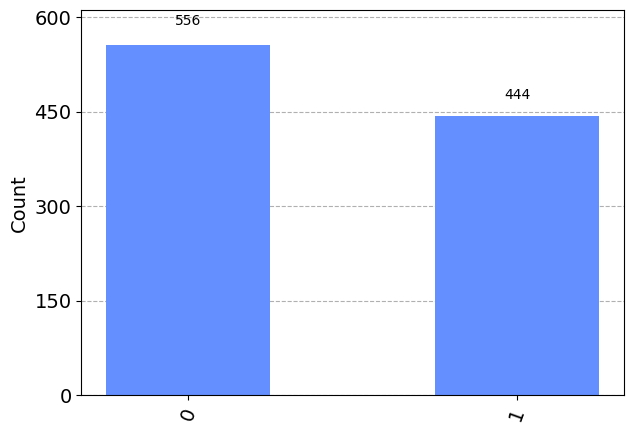

In [17]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000) # realiza 1000 medições
display(statistics) # exibe a quantidade de 0s e de 1s
plot_histogram(statistics) # mostra essa estatística em formato de gráfico

In [18]:
X = Operator([ [0,1],[1,0] ]) # cria o operador X como uma matriz
Y = Operator([ [0,-1.j],[1.j,0] ])
Z = Operator([ [1,0],[0,-1] ])
H = Operator([ [1/sqrt(2),1/sqrt(2)],[1/sqrt(2),-1/sqrt(2)] ])
S = Operator([ [1,0],[0,1.j] ])
T = Operator([ [1,0],[0,(1+1.j)/sqrt(2)] ])

v = Statevector([1,0]) # define o quantum state vector

# aplica as operações no qubit

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw('latex')

<IPython.core.display.Latex object>

In [19]:
circuit = QuantumCircuit(1) # definindo um circuito com 1 qubit

circuit.h(0) # aplicando a porta Hadamard ao qubit 0
circuit.t(0) # aplicando a porta T ao qubit 0
circuit.h(0) # aplicando a porta Hadamard novamente ao qubit 0
circuit.t(0) # aplicando a porta T ao qubit 0
circuit.z(0) # aplicando a porta Z ao qubit 0

circuit.draw() #desenha o circuito

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

In [20]:
ket0 = Statevector([1,0]) # definindo o vetor 'ket0' como o ket 0 [1,0] (qubit)
v = ket0.evolve(circuit) # aplica o ket 0 no circuito
v.draw('latex')

<IPython.core.display.Latex object>

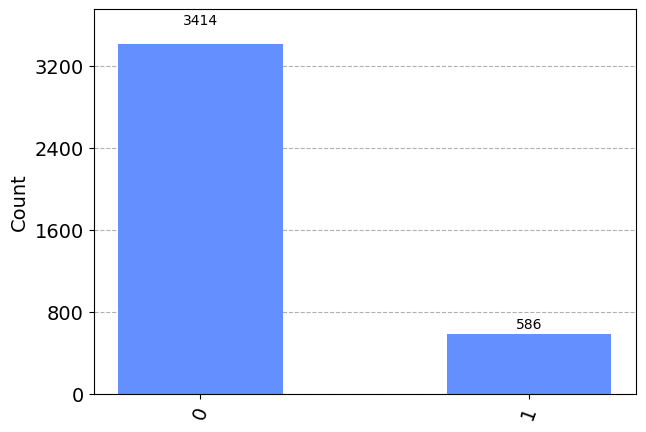

In [21]:
statistics = v.sample_counts(4000) # simula o resultado do experimento realizando 4000 medições
plot_histogram(statistics)  